<a href="https://colab.research.google.com/github/MehmetCanYildirim/Projects/blob/main/%5BAAN%5D_EEG_Emotion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset consists of recorded Electroencephalograpy (EEG) brain wave data and the emotional state of these brain waves label. These labels are divided into 3 class which are positive, neutral, and negative moods.

You can find the datasets in kaggle which is the very popular website for datasets, educations, and some competitions that you can join.

Here is the link of the dataset: https://www.kaggle.com/birdy654/eeg-brainwave-dataset-feeling-emotions?select=emotions.csv

In this study, I scrutinized EEG signals which are the recorded from sculp for electrical activity of brain to detect emotional state in different situations by using Artificial Neural Network (ANN).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
from google.colab import files


uploaded = files.upload()

Saving emotions.csv to emotions.csv


In [3]:
data = pd.read_csv('emotions.csv')
data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,mean_d_0_a2,mean_d_1_a2,mean_d_2_a2,mean_d_3_a2,mean_d_4_a2,mean_d_5_a,mean_d_6_a,mean_d_7_a,mean_d_8_a,mean_d_9_a,mean_d_10_a,mean_d_11_a,mean_d_12_a,mean_d_13_a,mean_d_14_a,mean_d_15_a,mean_d_16_a,mean_d_17_a,mean_d_18_a,mean_d_19_a,mean_d_20_a,mean_d_21_a,mean_d_22_a,mean_d_23_a,mean_d_24_a,mean_d_25_a,mean_d_26_a,mean_d_27_a,mean_d_28_a,mean_d_29_a,...,fft_711_b,fft_712_b,fft_713_b,fft_714_b,fft_715_b,fft_716_b,fft_717_b,fft_718_b,fft_719_b,fft_720_b,fft_721_b,fft_722_b,fft_723_b,fft_724_b,fft_725_b,fft_726_b,fft_727_b,fft_728_b,fft_729_b,fft_730_b,fft_731_b,fft_732_b,fft_733_b,fft_734_b,fft_735_b,fft_736_b,fft_737_b,fft_738_b,fft_739_b,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,2.15,29.5,-353.0,14.40,21.5,5.98,30.7,-343.0,14.70,27.9,3.170,32.2,-368.0,15.90,36.4,7.08,28.8,-359.0,17.30,19.6,-3.8300,-1.230,-10.80000,-0.363,-6.41,-1.03,-2.780,14.600,-1.540,-14.900000,...,30.90,-24.4,-24.4,30.90,-442.0,388.0,-197.0,-197.0,388.0,-564.0,500.00,-245.00,-245.00,500.00,-88.8,214.0,-88.8,-88.8,214.0,-606.0,509.000,-261.0,-261.0,509.000,-399.0,374.00,-185.00,-185.00,374.00,74.3,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,25.60,32.8,29.6,21.50,17.4,25.50,31.7,31.5,26.20,32.9,31.800,33.1,33.2,28.50,26.8,32.40,34.7,33.8,27.00,14.2,0.0342,1.100,-1.87000,-4.690,-15.40,-6.22,-0.328,-3.530,-6.980,-9.370000,...,-5.99,-19.1,-19.1,-5.99,163.0,-11.0,-10.7,-10.7,-11.0,117.0,-3.93,17.90,17.90,-3.93,112.0,-13.9,25.5,25.5,-13.9,225.0,-0.968,-27.7,-27.7,-0.968,97.4,-19.00,40.70,40.70,-19.00,130.0,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,7.75,30.1,-441.0,9.89,25.3,-68.90,25.3,-481.0,-65.40,20.0,79.800,31.0,-408.0,91.90,29.5,18.80,31.1,-335.0,32.20,19.9,76.6000,4.850,39.90000,75.300,5.27,-72.00,-0.843,-33.000,-82.000,-4.200000,...,585.00,-285.0,-285.0,585.00,-94.3,183.0,-110.0,-110.0,183.0,-133.0,200.00,-72.00,-72.00,200.00,-356.0,295.0,-158.0,-158.0,295.0,-251.0,255.000,-95.7,-95.7,255.000,-177.0,159.00,-48.80,-48.80,159.00,-534.0,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,17.30,32.0,-148.0,20.40,22.8,13.20,31.5,-147.0,16.90,27.7,15.700,30.7,-142.0,20.70,22.8,13.60,32.2,-135.0,21.20,23.8,4.1500,0.556,-0.35400,3.460,-4.96,1.63,1.330,-5.830,-0.298,0.000777,...,249.00,-146.0,-146.0,249.00,359.0,-146.0,13.7,13.7,-146.0,119.0,-7.64,-7.17,-7.17,-7.64,-296.0,316.0,-218.0,-218.0,316.0,322.0,-113.000,38.4,38.4,-113.000,245.0,-61.90,-5.08,-5.08,-61.90,-183.0,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,26.10,34.3,43.7,23.70,20.6,-3.87,34.1,43.7,-10.00,22.9,59.400,26.7,60.3,64.70,26.9,32.30,30.1,33.6,31.60,27.7,30.0000,0.276,-0.00677,33.700,-2.36,-33.30,7.640,-16.600,-41.100,-6.290000,...,18.30,-11.9,-11.9,18.30,159.0,-18.2,-25.6,-25.6,-18.2,194.0,32.70,-54.50,-54.50,32.70,154.0,26.4,-56.4,-56.4,26.4,252.0,9.940,-37.4,-37.4,9.940,172.0,15.90,-7.25,-7.25,15.90,114.0,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,33.30,33.4,31.0,32.30,18.6,30.00,33.0,32.6,29.50,29.1,32.000,29.9,32.6,28.50,24.9,34.50,32.4,32.4,33.00,20.8,3.3500,0.461,-1.61000,2.880,-10.60,1.31,3.490,-1.540,3.860

In [4]:
data['label'].value_counts()

NEUTRAL     716
POSITIVE    708
NEGATIVE    708
Name: label, dtype: int64

In [5]:
label_mapping = {'NEGATIVE':0, 'NEUTRAL':1 , 'POSITIVE':2}

In [6]:
data['label'].replace(label_mapping)

0       0
1       1
2       2
3       2
4       1
       ..
2127    1
2128    2
2129    0
2130    0
2131    1
Name: label, Length: 2132, dtype: int64

In [7]:
def preprocessing(df):
    df = df.copy()
    df['label'] = df['label'].replace(label_mapping)
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()

    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=123)
    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = preprocessing(data)

In [9]:
X_test.shape

(427, 2548)

In [10]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs= inputs, outputs=outputs)

print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2548)]            0         
_________________________________________________________________
dense (Dense)                (None, 64)                163136    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 167,491
Trainable params: 167,491
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.compile(optimizer='adam',
             loss ='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=50,
                    validation_split=0.2)

Epoch 1/50
43/43 [==============================] - 1s 10ms/step - loss: 15862089121792.0000 - accuracy: 0.5440 - val_loss: 18014068015104.0000 - val_accuracy: 0.5924
Epoch 2/50
43/43 [==============================] - 0s 4ms/step - loss: 3566493237248.0000 - accuracy: 0.4971 - val_loss: 10957785923584.0000 - val_accuracy: 0.5806
Epoch 3/50
43/43 [==============================] - 0s 4ms/step - loss: 13091135815680.0000 - accuracy: 0.5220 - val_loss: 70861943996416.0000 - val_accuracy: 0.5455
Epoch 4/50
43/43 [==============================] - 0s 4ms/step - loss: 9842114691072.0000 - accuracy: 0.5066 - val_loss: 23880083177472.0000 - val_accuracy: 0.5748
Epoch 5/50
43/43 [==============================] - 0s 5ms/step - loss: 9443605479424.0000 - accuracy: 0.5066 - val_loss: 24261288787968.0000 - val_accuracy: 0.5572
Epoch 6/50
43/43 [==============================] - 0s 4ms/step - loss: 16889466060800.0000 - accuracy: 0.5301 - val_loss: 7941557583872.0000 - val_accuracy: 0.5660
Epoch 7

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 89445764169728.0
Test accuracy: 0.48009368777275085


              precision    recall  f1-score   support

    NEGATIVE       0.71      0.78      0.75       125
     NEUTRAL       0.48      0.06      0.11       159
    POSITIVE       0.36      0.68      0.47       143

    accuracy                           0.48       427
   macro avg       0.52      0.51      0.44       427
weighted avg       0.51      0.48      0.42       427



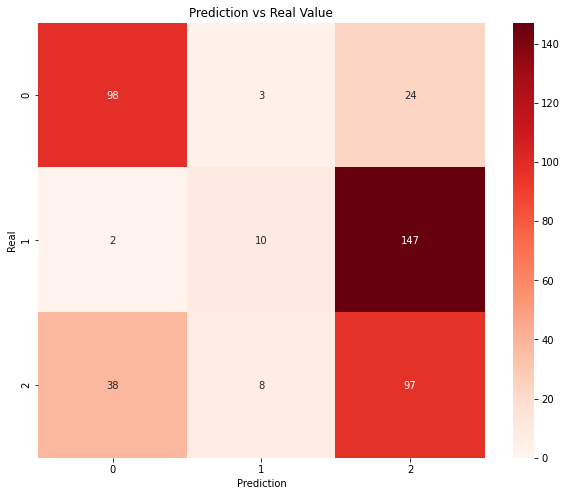

In [13]:
yprediction = np.array(list(map(lambda a: np.argmax(a), model.predict(X_test))))


con_mat = confusion_matrix(y_test, yprediction)
class_rep = classification_report(y_test, yprediction, target_names = label_mapping.keys())
print(class_rep)

plt.figure(figsize=(10,8))
sns.heatmap(con_mat, annot = True, vmin=0, cbar = True, fmt ='g', cmap='Reds')
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title("Prediction vs Real Value")
plt.show()